# Informe EDA - Dataset MOVIES

In [23]:
%run lib.ipynb

# Lectura del dataset de películas generado al finalizar el ETL de movies
df_movies = pd.read_csv("../datasets/movies_dataset_clean.csv")
df_movies.info()
df_movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45376 entries, 0 to 45375
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             45376 non-null  int64  
 1   belongs_to_collection  4488 non-null   object 
 2   budget                 45376 non-null  int64  
 3   genres                 45376 non-null  object 
 4   id                     45376 non-null  int64  
 5   original_language      45365 non-null  object 
 6   overview               44435 non-null  object 
 7   popularity             45376 non-null  float64
 8   production_companies   45376 non-null  object 
 9   production_countries   45376 non-null  object 
 10  release_date           45376 non-null  object 
 11  revenue                45376 non-null  float64
 12  runtime                45130 non-null  float64
 13  spoken_languages       45376 non-null  object 
 14  status                 45296 non-null  object 
 15  ta

,Unnamed: 0,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return
0,0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0,1995,12.451801
1,1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995,4.043035
2,2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995,0.000000
3,3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,1995,5.090760
4,4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995,0.000000


## Chequeo de nulos

In [24]:
#suma de valores nulos por columna
print(columnas_de_nulos(df_movies))


belongs_to_collection    40888
original_language           11
overview                   941
runtime                    246
status                      80
tagline                  24978
dtype: int64


### De un total de 45376, la columna "belongs_to_collection" tiene un 90.1% de valores nulos, como además la columna no será utilizada en el API (ni en el recomendador), será eliminada

In [25]:
df_movies = df_movies.drop(['belongs_to_collection'], axis=1)
print(columnas_de_nulos(df_movies))

original_language       11
overview               941
runtime                246
status                  80
tagline              24978
dtype: int64


### Para la columna "original_language", tenemos 11 filas con valor nulo. 8 de ellos tienen sólo un valor en la columna "spoken_languages" así que lo imputaremos en "original_languaje", para las 4 restantes imputaremos el primer valor que se encuentre en #spoken_languajes". Esta columna es de interes ya que posteriormente la utilizaré para reducir el dataset y poder factibilizar la ejecución del algoritmo de recomendación, ya que con todo el dataset genera problemas de memoria.

In [26]:
df_movies.loc[[21579, 22805, 32103], ['original_language']] = 'en'
df_movies.loc[[19559, 44494], ['original_language']] = ''
df_movies.loc[[37354], ['original_language']] = 'cs'
df_movies.loc[[40982], ['original_language']] = 'ur'
df_movies.loc[[41802, 44573], ['original_language']] = 'xx'
df_movies.loc[[43978], ['original_language']] = 'fr'
df_movies.loc[[44328], ['original_language']] = 'sv'

print(columnas_de_nulos(df_movies))


overview      941
runtime       246
status         80
tagline     24978
dtype: int64


### Utilizaré la columna "overview" como la base del algoritmo de recomendación, por lo que necesito que este poblada para todas las películas. Utilizaré en primera instancia la columna "tagline" y posteriormente la columna "title".

In [27]:

#Reemplazo los valores nulos de la columna overview por su correspondiente en tagline
df_movies["overview"] = df_movies["overview"].fillna(df_movies["tagline"])

#Reemplazo los valores nulos de la columna overview por su correspondiente en title
df_movies["overview"] = df_movies["overview"].fillna(df_movies["title"])

print(columnas_de_nulos(df_movies))


runtime      246
status        80
tagline    24978
dtype: int64


### La columna "runtime" es de interes para generar correlaciones posteriormente, voy a utilizar el valor promedio para rellenar los valores nulos ya que representan sólo el 0.51% de los datos en esa columna. 

In [28]:
df_movies["runtime"] = df_movies["runtime"].fillna(df_movies["runtime"].mean())
print(columnas_de_nulos(df_movies))


status        80
tagline    24978
dtype: int64


### Todos los registros con valor nulo en la columna "status", presentan "release_year" en fechas pasadas y además indicadores en la columna "popularity", por loq ue asignaremos el valor "Released" para todos los registros con valor nulo.

In [29]:
df_movies[df_movies['status'].isnull()]

,Unnamed: 0,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return
189,189,0,"[{'id': 99, 'name': 'Documentary'}]",56088,en,A documentary about the culture of hip-hop. Th...,0.159596,[],[],1995-08-25,0.0,93.000000,[],NaN,What Happens On Stage Is Only Half The Story!,The Show,5.3,2.0,1995,0.0
765,765,0,"[{'id': 99, 'name': 'Documentary'}]",52059,en,The Gate of Heavenly Peace is a feature-length...,0.107050,[],[],1995-01-01,0.0,180.000000,[],NaN,NaN,The Gate of Heavenly Peace,6.7,3.0,1995,0.0
1382,1382,0,"[{'id': 35, 'name': 'Comedy'}]",40506,en,Wally Sparks is a tabloid TV show reporter who...,0.576741,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",1997-01-01,0.0,105.000000,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,NaN,Meet Wally Sparks,5.3,10.0,1997,0.0
2138,2138,0,[],77314,fr,The Cabinet of Dr. Ramirez,0.037500,[],[],1991-12-04,0.0,94.181675,[],NaN,NaN,The Cabinet of Dr. Ramirez,0.0,0.0,1991,0.0
4126,4126,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",109472,en,The Girl,0.001653,[],[],2001-06-06,0.0,0.000000,[],NaN,NaN,The Girl,0.0,0.0,2001,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44295,44295,0,[],39827,en,A celebration of 30 years of The Who.,0.014260,[],[],1994-08-15,0.0,155.000000,[],NaN,NaN,The Who: Thirty Years of Maximum R&B,0.0,0.0,1994,0.0
44983,44983,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",49492,en,"Jogwa actually means alms given to a person, u...",0.004990,[],[],2009-09-25,0.0,92.000000,[],NaN,The Awakening,Jogwa - The Awakening,0.0,0.0,2009,0.0
45005,45005,0,[],128268,en,Documentary about Veruschka von Lehndorff.,0.056298,[],"[{'iso_3166_1': 'DE', 'name': 'Germany'}]",2005-09-30,0.0,52.000000,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",NaN,NaN,Veruschka: A Life for the Camera,6.0,1.0,2005,0.0
45073,45073,0,[],41811,en,"At a spacious house in Los Angeles, Helene is ...",0.000002,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",1990-11-30,0.0,110.000000,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,NaN,Eating,0.0,0.0,1990,0.0


In [30]:
df_movies['status'] = df_movies['status'].fillna('Released')
print(columnas_de_nulos(df_movies))

tagline    24978
dtype: int64


### La columna "tagline" presenta un 50% de valores nulos, así que sólo le asignaremos ''.

In [31]:
df_movies["tagline"] = df_movies["tagline"].fillna('')
print(columnas_de_nulos(df_movies))
print('\n')
df_movies.info()

Series([], dtype: float64)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45376 entries, 0 to 45375
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            45376 non-null  int64  
 1   budget                45376 non-null  int64  
 2   genres                45376 non-null  object 
 3   id                    45376 non-null  int64  
 4   original_language     45376 non-null  object 
 5   overview              45376 non-null  object 
 6   popularity            45376 non-null  float64
 7   production_companies  45376 non-null  object 
 8   production_countries  45376 non-null  object 
 9   release_date          45376 non-null  object 
 10  revenue               45376 non-null  float64
 11  runtime               45376 non-null  float64
 12  spoken_languages      45376 non-null  object 
 13  status                45376 non-null  object 
 14  tagline               45376 non-null  obj

## Valores duplicados

### Buscaremos valores duplicados para filas completas

In [32]:
df_movies[df_movies.duplicated(keep=False)]

,Unnamed: 0,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return


### Eliminaremos las duplicadas quedándonos con la primera ocurrencia

In [33]:
df_movies = df_movies.drop_duplicates(keep='first')
df_movies[df_movies.duplicated(keep=False)]



,Unnamed: 0,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return


### Buscaremos valores duplicados sólo para la columna id

In [34]:
df_movies[df_movies.duplicated(keep=False, subset=['id'])].sort_values(by=['id','popularity'])

,Unnamed: 0,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return
33785,33785,30000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",4912,en,"Television made him famous, but his biggest hi...",7.645827,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-12-30,33013805.0,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some things are better left top secret.,Confessions of a Dangerous Mind,6.6,281.0,2002,1.100460
5861,5861,30000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",4912,en,"Television made him famous, but his biggest hi...",11.331072,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-12-30,33013805.0,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some things are better left top secret.,Confessions of a Dangerous Mind,6.6,281.0,2002,1.100460
7340,7340,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",5511,fr,Hitman Jef Costello is a perfectionist who alw...,9.091288,"[{'name': 'Fida cinematografica', 'id': 73}, {...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1967-10-25,39481.0,105.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,There is no solitude greater than that of the ...,Le Samouraï,7.9,187.0,1967,0.000000
9160,9160,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",5511,fr,Hitman Jef Costello is a perfectionist who alw...,9.091288,"[{'name': 'Fida cinematografica', 'id': 73}, {...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1967-10-25,39481.0,105.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,There is no solitude greater than that of the ...,Le Samouraï,7.9,187.0,1967,0.000000
44738,44738,16000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",10991,ja,When Molly Hale's sadness of her father's disa...,6.480376,"[{'name': 'TV Tokyo', 'id': 3034}, {'name': '4...","[{'iso_3166_1': 'JP', 'name': 'Japan'}]",2000-07-08,68411275.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pokémon: Spell of the Unknown,Pokémon: Spell of the Unknown,6.0,144.0,2000,4.275705
4110,4110,16000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",10991,ja,When Molly Hale's sadness of her father's disa...,10.264597,"[{'name': 'TV Tokyo', 'id': 3034}, {'name': '4...","[{'iso_3166_1': 'JP', 'name': 'Japan'}]",2000-07-08,68411275.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pokémon: Spell of the Unknown,Pokémon: Spell of the Unknown,6.0,143.0,2000,4.275705
14006,14006,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",11115,en,As an ex-gambler teaches a hot-shot college ki...,6.880365,"[{'name': 'Andertainment Group', 'id': 2634}, ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2008-01-29,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,,Deal,5.2,22.0,2008,0.000000
24814,24814,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",11115,en,As an ex-gambler teaches a hot-shot college ki...,6.880365,"[{'name': 'Andertainment Group', 'id': 2634}, ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2008-01-29,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,,Deal,5.2,22.0,2008,0.000000
44743,44743,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",12600,ja,"All your favorite Pokémon characters are back,...",6.080108,[],"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",2001-07-06,28023563.0,75.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,,Pokémon 4Ever: Celebi - Voice of the Forest,5.7,82.0,2001,0.000000
5531,5531,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",12600,ja,"All your favorite Pokémon characters are back,...",7.072301,[],"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",2001-07-06,28023563.0,75.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,,Pokémon 4Ever: Celebi - Voice of the Forest,5.7,82.0,2001,0.000000


### Existen valores duplicados en la columna "id", la diferencia al analizar los registros se concentra en la columna "popularity", eliminaremos los registros duplicados conservando el que tenga la mayor popularidad.

In [35]:
df_movies = df_movies.sort_values(by=['id','popularity'], kind='mergesort').drop_duplicates('id', keep='last')
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45346 entries, 4338 to 20169
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            45346 non-null  int64  
 1   budget                45346 non-null  int64  
 2   genres                45346 non-null  object 
 3   id                    45346 non-null  int64  
 4   original_language     45346 non-null  object 
 5   overview              45346 non-null  object 
 6   popularity            45346 non-null  float64
 7   production_companies  45346 non-null  object 
 8   production_countries  45346 non-null  object 
 9   release_date          45346 non-null  object 
 10  revenue               45346 non-null  float64
 11  runtime               45346 non-null  float64
 12  spoken_languages      45346 non-null  object 
 13  status                45346 non-null  object 
 14  tagline               45346 non-null  object 
 15  title                

## Valores faltantes

### Realizaremos el análisis para las columnas relevantes para el funcionamiento de los endpoints de la API. Estos son las columnas "id", "original_language", "popularity", "title", "vote_average", "vote_count", "budget", "return", "overview" y "release_date".

In [36]:
selected_columns = ['id','original_language','title','release_date','budget', 'return','vote_count','vote_average','popularity','overview']
print(df_movies[selected_columns].isna().sum())


id                   0
original_language    0
title                0
release_date         0
budget               0
return               0
vote_count           0
vote_average         0
popularity           0
overview             0
dtype: int64


### No se detectan valores faltantes.

## Tipos de datos

### se analizarán los tipos de datos para las columnas relevantes.

In [37]:
selected_columns = ['id','original_language','title','release_date','budget', 'return','vote_count','vote_average','popularity','overview']
df_movies[selected_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 45346 entries, 4338 to 20169
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 45346 non-null  int64  
 1   original_language  45346 non-null  object 
 2   title              45346 non-null  object 
 3   release_date       45346 non-null  object 
 4   budget             45346 non-null  int64  
 5   return             45346 non-null  float64
 6   vote_count         45346 non-null  float64
 7   vote_average       45346 non-null  float64
 8   popularity         45346 non-null  float64
 9   overview           45346 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 3.8+ MB


### Cambiaremos a numérico las columnas "id" y "budget" y a datetime la columna "release_date"

In [38]:
df_movies['id'] = pd.to_numeric(df_movies['id'])
df_movies['budget'] = pd.to_numeric(df_movies['budget'])
df_movies['release_date'] = df_movies['release_date'].apply(pd.to_datetime, format='%Y-%m-%d').dt.date
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])

df_movies['popularity'] = pd.to_numeric(df_movies['popularity'], errors='coerce')
df_movies['popularity'] = df_movies['popularity'].fillna(0)
df_movies['popularity'] = df_movies['popularity'].astype(float)

df_movies[selected_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 45346 entries, 4338 to 20169
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 45346 non-null  int64         
 1   original_language  45346 non-null  object        
 2   title              45346 non-null  object        
 3   release_date       45346 non-null  datetime64[ns]
 4   budget             45346 non-null  int64         
 5   return             45346 non-null  float64       
 6   vote_count         45346 non-null  float64       
 7   vote_average       45346 non-null  float64       
 8   popularity         45346 non-null  float64       
 9   overview           45346 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 3.8+ MB


### Cambiamos el resto de columnas a string

In [39]:
df_movies['original_language'] = df_movies['original_language'].astype('string')
df_movies['title'] = df_movies['title'].astype('string')
df_movies['overview'] = df_movies['overview'].astype('string')
df_movies[selected_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 45346 entries, 4338 to 20169
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 45346 non-null  int64         
 1   original_language  45346 non-null  string        
 2   title              45346 non-null  string        
 3   release_date       45346 non-null  datetime64[ns]
 4   budget             45346 non-null  int64         
 5   return             45346 non-null  float64       
 6   vote_count         45346 non-null  float64       
 7   vote_average       45346 non-null  float64       
 8   popularity         45346 non-null  float64       
 9   overview           45346 non-null  string        
dtypes: datetime64[ns](1), float64(4), int64(2), string(3)
memory usage: 3.8 MB


### Resetearemos el índice del dataframe

In [40]:
df_movies.reset_index(drop=True, inplace=True)

## Análisis estadístico

### En primer lugar describiremos el dataset

In [41]:
df_movies.describe()

,Unnamed: 0,budget,id,popularity,release_date,revenue,runtime,vote_average,vote_count,release_year,return
count,45346.000000,4.534600e+04,45346.000000,45346.000000,45346,4.534600e+04,45346.000000,45346.000000,45346.000000,45346.000000,4.534600e+04
mean,22690.731178,4.232580e+06,108042.219645,2.926236,1992-05-16 07:38:33.253649664,1.123366e+07,94.177826,5.624196,110.135293,1991.882834,6.604792e+02
min,0.000000,0.000000e+00,2.000000,0.000000,1874-12-09 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000e+00
25%,11343.250000,0.000000e+00,26390.250000,0.388831,1978-10-06 00:00:00,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.000000e+00
50%,22694.500000,0.000000e+00,59852.500000,1.130285,2001-08-30 00:00:00,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.000000e+00
75%,34036.750000,0.000000e+00,156601.500000,3.689337,2010-12-17 00:00:00,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.000000e+00
max,45375.000000,3.800000e+08,469172.000000,547.488298,2020-12-16 00:00:00,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,1.239638e+07
std,13099.532180,1.744373e+07,112187.326746,6.010956,NaN,6.440990e+07,38.244611,1.915339,491.899276,24.053040,7.471800e+04


- Todas las columnas tienen 45346 registros.
- La media de popularidad es de 2.96 con una media de 110 votaciones.
- La nota mínima es 0 y la máxima es 10, el promedio de una película esta en 5.62 con una desviación estandar de 1.91, es decir, la mayoría de películas tiene una nota entre 3.71 y 7.53.
- La duración media de una película es de 94 minutos, con una desviavción estándar de 38 minutos, el valor máximo es de 1256 minutos, que claramente esta muy por sobre la media, lo que es reafirmado por el percentil 75 que sólo tiene peliculas de hasta 107 minutos de duración.
- El presupuesto promedio es de USDMM$4.23 con una ganancia media de USDMM$1.12. La máxima ganancia en el set de datos para una película es de USDMM$200.78


## Análisis de correlaciones

### Matriz de correlaciones

In [42]:
#dejo fuera el retorno ya que es linealmente dependiente entre revenue y budget
selected_columns = ['release_year','budget', 'revenue', 'vote_count','vote_average','popularity']
df_movies[selected_columns].corr(method='spearman')

,release_year,budget,revenue,vote_count,vote_average,popularity
release_year,1.000000,0.141140,0.103468,0.196799,-0.008834,0.185655
budget,0.141140,1.000000,0.644408,0.483813,0.071782,0.463064
revenue,0.103468,0.644408,1.000000,0.512751,0.126532,0.490783
vote_count,0.196799,0.483813,0.512751,1.000000,0.317472,0.893500
vote_average,-0.008834,0.071782,0.126532,0.317472,1.000000,0.241306
popularity,0.185655,0.463064,0.490783,0.893500,0.241306,1.000000


### Mapa de calor

<function matplotlib.pyplot.show(close=None, block=None)>

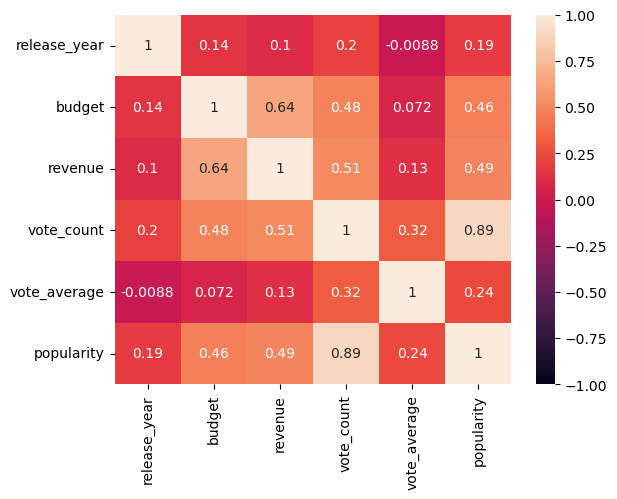

In [43]:
sns.heatmap(df_movies[selected_columns].corr(method='spearman'), annot=True,  vmax=1, vmin=-1)
plt.show

- Encontramos alta correlación entre la popularidad y la cantidad de votos recibidos ("vote_count"), con una correlación del 89%.
- También se encuntra una correlación de 64% entre el presupuesto de la película y la ganancia obtenida.
- No existe correlación entre la nota promedio y la ganancia, con sólo un 13%, estro indicaría que la calidad medida por las personas no estaría sesgada por el presupuesto de la película.


## Re-generar archivos que serán utrilizados por el API

In [44]:
#crea nuevo dataframe para calcular las recomendaciones
data_recomendaciones = pd.DataFrame(df_movies, columns=['overview', 'tagline', 'title', 'spoken_languages', 'release_date']).copy()

data_recomendaciones.reset_index(drop=True, inplace=True)
data_recomendaciones["overview"] = data_recomendaciones["overview"].str.lower()
data_recomendaciones["title"] = data_recomendaciones["title"].str.lower()

#reducir el tamaño del contenido de la columna overview para disminuir el tamaño de la matriz de recomendaciones
#data_recomendaciones["overview"] = data_recomendaciones["overview"].apply(lambda x: textwrap.shorten(x, 150, placeholder=''))

#eliminar peliculas que no esten habladas en ingles
print(data_recomendaciones['spoken_languages'].str.contains("English").sum())
data_recomendaciones = data_recomendaciones[data_recomendaciones['spoken_languages'].str.contains("English") == True]

#eliminar peliculas con release_date < '01-01-2015'
data_recomendaciones = data_recomendaciones[data_recomendaciones['release_date'] >= '2015-01-01']

data_recomendaciones.reset_index(drop=True, inplace=True)
data_recomendaciones = data_recomendaciones.drop(['spoken_languages', 'release_date'], axis=1)
print(data_recomendaciones.shape)

write_parquet(data_recomendaciones, '../datasets/data_recomendaciones_dataset.parquet')

write_parquet(df_movies, '../datasets/movies_dataset.parquet')

28711
(2653, 3)
